<a href="https://colab.research.google.com/github/danismg/Assignment-Startup-Campus/blob/main/DS04026_Daniel_Andres_Simangunsong_Assignment_3_Heart_disease_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/StartupCampus/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Checking for null values

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Checking for balanced dataset

In [ ]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# sns.countplot('target',data=df)

# Performing Feature Selection

## Checking Correlation

In [ ]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [ ]:
x=df.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y=df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

## Univariate Selection For categorical Variable

In [ ]:
bestfeatures = SelectKBest(score_func=chi2)

In [ ]:
fit = bestfeatures.fit(x,y)
scores = pd.DataFrame(fit.scores_)

In [ ]:
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,scores],axis=1)
featureScores.columns = ['Label','Score']

In [ ]:
featureScores.sort_values(by='Score',ascending=False)

,Label,Score
7,thalach,650.008493
9,oldpeak,253.653461
2,cp,217.823922
11,ca,210.625919
8,exang,130.470927
4,chol,110.723364
0,age,81.425368
3,trestbps,45.974069
10,slope,33.673948
1,sex,24.373650


### Droping the features which are not correlated

In [ ]:
df.drop(['fbs','restecg'],axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 12)

### Feature Engineering

In [ ]:
for i in df.columns:
    print(i,df[i].unique())
    print('\n')

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]


sex [1 0]


cp [0 1 2 3]


trestbps [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]


chol [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]


thala

#### sex,cp,restecg,exang,slope,ca,thal,target are categorical column

In [ ]:
new_sex=pd.get_dummies(data=df['sex'],prefix='sex')
new_sex

,sex_0,sex_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
1020,0,1
1021,0,1
1022,0,1
1023,1,0


In [ ]:
new_cp=pd.get_dummies(df['cp'],prefix='chestPain')
new_cp

,chestPain_0,chestPain_1,chestPain_2,chestPain_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1020,0,1,0,0
1021,1,0,0,0
1022,1,0,0,0
1023,1,0,0,0


In [ ]:
new_exang=pd.get_dummies(df['exang'],prefix='exang')
new_exang

,exang_0,exang_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
1020,0,1
1021,0,1
1022,0,1
1023,1,0


In [ ]:
new_slope=pd.get_dummies(df['slope'],prefix='slope')
new_slope

,slope_0,slope_1,slope_2
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
1020,0,0,1
1021,0,1,0
1022,0,1,0
1023,0,0,1


In [ ]:
new_thal=pd.get_dummies(df['thal'],prefix='thal')
new_thal

,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1020,0,0,1,0
1021,0,0,0,1
1022,0,0,1,0
1023,0,0,1,0


In [ ]:
new_ca=pd.get_dummies(df['ca'],prefix='ca')
new_ca

,ca_0,ca_1,ca_2,ca_3,ca_4
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1020,1,0,0,0,0
1021,0,1,0,0,0
1022,0,1,0,0,0
1023,1,0,0,0,0


In [ ]:
app=[df,new_sex,new_cp,new_ca,new_thal,new_exang,new_slope]

In [ ]:
df1=pd.concat(app,axis=1)

In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,1,0,125,212,168,0,1.0,2,2,...,0,0,0,0,1,1,0,0,0,1
1,53,1,0,140,203,155,1,3.1,0,0,...,0,0,0,0,1,0,1,1,0,0
2,70,1,0,145,174,125,1,2.6,0,0,...,0,0,0,0,1,0,1,1,0,0
3,61,1,0,148,203,161,0,0.0,2,1,...,0,0,0,0,1,1,0,0,0,1
4,62,0,0,138,294,106,0,1.9,1,3,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'sex_0', 'sex_1', 'chestPain_0',
       'chestPain_1', 'chestPain_2', 'chestPain_3', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
df1.drop(['sex','cp','thal','exang','ca','slope'],axis=1,inplace=True)

In [ ]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,125,212,168,1.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
2,70,145,174,125,2.6,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
3,61,148,203,161,0.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
df1.shape

(1025, 26)

### Feature Scaling

In [ ]:
sc=StandardScaler()

In [ ]:
df1[['age','trestbps','chol','oldpeak','thalach']]=sc.fit_transform(df1[['age','trestbps','chol','oldpeak','thalach']])

In [ ]:
df1.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
5,0.393241,-1.805540,0.038784,-1.179158,-0.060888,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
6,0.393241,-1.005914,1.396233,-0.396362,2.834010,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
7,0.062402,1.621431,0.833861,-0.178919,-0.231177,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0
8,-0.930114,-0.663216,0.058176,-0.222407,-0.231177,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
9,-0.047877,-0.548984,0.775685,-1.440090,1.812281,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
df1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'chestPain_0', 'chestPain_1', 'chestPain_2', 'chestPain_3',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
x=df1.drop('target',axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
y=df1['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Hypothesis

**Hypothesis 1**

H0: Jenis nyeri dada dapat mempengaruhi risiko seseorang terkena penyakit jantung

H1: Jenis nyeri dada dapat mempengaruhi tidak risiko seseorang terkena penyakit jantung

In [ ]:
# Prepare data for analysis
cp_yes = df[df['target']==1]['cp']
cp_no = df[df['target']==0]['cp']

# Filter data for disease_yes and disease_no
cp_mean = cp_yes.mean()
cp_std = cp_yes.std()
cp_no_mean = cp_no.mean()
cp_yes_std = cp_no.std()

# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(cp_yes, cp_no)

print("cp_yes: {:.2f}, Standard Deviation: {:.2f}".format(cp_mean, cp_std))
print("cp_no: {:.2f}, Standard Deviation: {:.2f}".format(cp_no_mean, cp_yes_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))


# Check hypothesis
if p_value < 0.05:

    print("Jenis nyeri dada dapat mempengaruhi risiko seseorang terkena penyakit jantung")
else:
    print(" Jenis nyeri dada dapat mempengaruhi tidak risiko seseorang terkena penyakit jantung")

cp_yes: 1.38, Standard Deviation: 0.95
cp_no: 0.48, Standard Deviation: 0.91
T-Statistic: 15.45, P-Value: 0.0000
Jenis nyeri dada dapat mempengaruhi risiko seseorang terkena penyakit jantung


**Hypothesis 2**

H0: tekanan darah yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantung

H1: tekanan darah yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung

In [ ]:
# Prepare data for analysis
trestbps_yes = df[df['target']==1]['trestbps']
trestbps_no = df[df['target']==0]['trestbps']

# Filter data for disease_yes and disease_no
trestbps_mean = trestbps_yes.mean()
trestbps_std = trestbps_yes.std()
trestbps_no_mean = trestbps_no.mean()
trestbps_yes_std = trestbps_no.std()

# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(trestbps_yes, trestbps_no)

print("trestbps_yes: {:.2f}, Standard Deviation: {:.2f}".format(trestbps_mean, trestbps_std))
print("trestbps_no: {:.2f}, Standard Deviation: {:.2f}".format(trestbps_no_mean, trestbps_yes_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))


# Check hypothesis
if p_value < 0.05:
    print("tekanan darah yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantun")
else:
    print(" tekanan darah yang tinggi tidak dapat meningkatkan risiko seseorang terkena penyakit jantun")

trestbps_yes: 129.25, Standard Deviation: 16.11
trestbps_no: 134.11, Standard Deviation: 18.58
T-Statistic: -4.48, P-Value: 0.0000
tekanan darah yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantun


**Hypothesis 1**

H0: Kadar serum kolestrol yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantung

H1: Kadar serum kolestrol yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung

In [ ]:
# Prepare data for analysis
chol_yes = df[df['target']==1]['chol']
chol_no = df[df['target']==0]['chol']

# Filter data for disease_yes and disease_no
chol_mean = chol_yes.mean()
chol_std = chol_yes.std()
chol_no_mean = chol_no.mean()
chol_yes_std = chol_no.std()

# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(chol_yes, chol_no)

print("chol_yes: {:.2f}, Standard Deviation: {:.2f}".format(chol_mean, chol_std))
print("chol_no: {:.2f}, Standard Deviation: {:.2f}".format(chol_no_mean, chol_yes_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))


# Check hypothesis
if p_value < 0.05:
    print("Kadar serum kolestrol yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung")
else:
    print("Kadar serum kolestrol yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantung")

chol_yes: 240.98, Standard Deviation: 53.01
chol_no: 251.29, Standard Deviation: 49.56
T-Statistic: -3.21, P-Value: 0.0014
Kadar serum kolestrol yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung


**Hypothesis 1**

H0: detak jantung maksimum yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantung

H1: detak jantung maksimum yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung

In [ ]:
# Prepare data for analysis
thalach_yes = df[df['target']==1]['thalach']
thalach_no = df[df['target']==0]['thalach']

# Filter data for disease_yes and disease_no
thalach_mean = thalach_yes.mean()
thalach_std = thalach_yes.std()
thalach_no_mean = thalach_no.mean()
thalach_yes_std = thalach_no.std()

# Calculate t-statistic and p-value
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(thalach_yes, thalach_no)

print("thalach_yes: {:.2f}, Standard Deviation: {:.2f}".format(thalach_mean, thalach_std))
print("thalach_no: {:.2f}, Standard Deviation: {:.2f}".format(thalach_no_mean, thalach_yes_std))
print("T-Statistic: {:.2f}, P-Value: {:.4f}".format(t_stat, p_value))


# Check hypothesis
if p_value < 0.05:
    print("detak jantung maksimum yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung")
else:
    print("detak jantung maksimum yang tinggi dapat meningkatkan risiko seseorang terkena penyakit jantung")

thalach_yes: 158.59, Standard Deviation: 19.10
thalach_no: 139.13, Standard Deviation: 22.57
T-Statistic: 14.93, P-Value: 0.0000
detak jantung maksimum yang tinggi tidak meningkatkan risiko seseorang terkena penyakit jantung


# Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [ ]:
# Create a Model
from sklearn.linear_model import LinearRegression
model = DecisionTreeClassifier()
# model = LinearRegression()

# Print the 5-fold cross-validation scores
scores = cross_val_score(model, x, y, cv=10)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 1.00 with standard deviation 0.01


# **Model Evaluation**
Ada beberapa model yang saya gunakan untuk case ini, yaitu :


*   Logistic Regression <br>
Alasan saya memilih model ini karena dari yang lihat bahwa dasaset memiliki model dengan type data category. Yang mana kita harus mengunakan teknik klasifikasi dalam pemodelan. Pada regresi terdapat 2 jenis yaitu Linier (Number) dan logistik (category)
*   Decision Tress Classifier
Alasan saya memilih ini karena dessicion trees sangat mudah memahaminya dan diinterpretasikan secara visual.
*   Random Forest Classfier
Alasan saya memilih ini mirip dengan 'Decision Tress Classifier' bedanya pada Random Forest ini  terdiri dari beberapa decision tree yang dibuat secara acak. Perlu kita ketahuin dengan menggunakan random forest dapat meningkatkan performa model klasfikasi dari model tree tadi.



In [ ]:
my_acc = {"Model":[],"Accuracy":[]};

## Logistic Regression


In [ ]:
model_name = 'Logistic Regression'
mod = LogisticRegression()
model = mod.fit(X_train, y_train)
mod_predict = mod.predict(X_test)
mod_conf_matrix = confusion_matrix(y_test, mod_predict)
mod_acc_score = accuracy_score(y_test, mod_predict)
print("confussion matrix")
print(mod_conf_matrix)
print("\n")
print("Accuracy of " +  model_name + ":",mod_acc_score*100,'\n')
print(classification_report(y_test,mod_predict))
my_acc["Model"].append(model_name)
my_acc["Accuracy"].append(mod_acc_score*100)

confussion matrix
[[84 16]
 [ 8 97]]


Accuracy of Logistic Regression: 88.29268292682927 

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       100
           1       0.86      0.92      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



## DecisionTreeClassifier


In [ ]:
model_name = 'DecisionTreeClassifier'
mod = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
model = mod.fit(X_train, y_train)
mod_predict = mod.predict(X_test)
mod_conf_matrix = confusion_matrix(y_test, mod_predict)
mod_acc_score = accuracy_score(y_test, mod_predict)
print("confussion matrix")
print(mod_conf_matrix)
print("\n")
print("Accuracy of " +  model_name + ":",mod_acc_score*100,'\n')
print(classification_report(y_test,mod_predict))
my_acc["Model"].append(model_name)
my_acc["Accuracy"].append(mod_acc_score*100)

confussion matrix
[[88 12]
 [10 95]]


Accuracy of DecisionTreeClassifier: 89.26829268292683 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       100
           1       0.89      0.90      0.90       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



## Random Forest Classfier


In [ ]:
model_name = 'Random Forest Classfier'
mod = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
model = mod.fit(X_train, y_train)
mod_predict = mod.predict(X_test)
mod_conf_matrix = confusion_matrix(y_test, mod_predict)
mod_acc_score = accuracy_score(y_test, mod_predict)
print("confussion matrix")
print(mod_conf_matrix)
print("\n")
print("Accuracy of " +  model_name + ":",mod_acc_score*100,'\n')
print(classification_report(y_test,mod_predict))
my_acc["Model"].append(model_name)
my_acc["Accuracy"].append(mod_acc_score*100)

confussion matrix
[[94  6]
 [ 6 99]]


Accuracy of Random Forest Classfier: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.94      0.94      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



# Model Evaluation

In [ ]:
model_ev = pd.DataFrame(my_acc)
model_ev

,Model,Accuracy
0,Logistic Regression,88.292683
1,DecisionTreeClassifier,89.268293
2,Random Forest Classfier,94.146341


Dasar hasil akurasi dari tiap model dapat kita simpulkan bahwa Model Random Forest Classfier merupakan model yang terbaik karena memiliki akurasi yang sangat tinggi dari semua model lainnya.


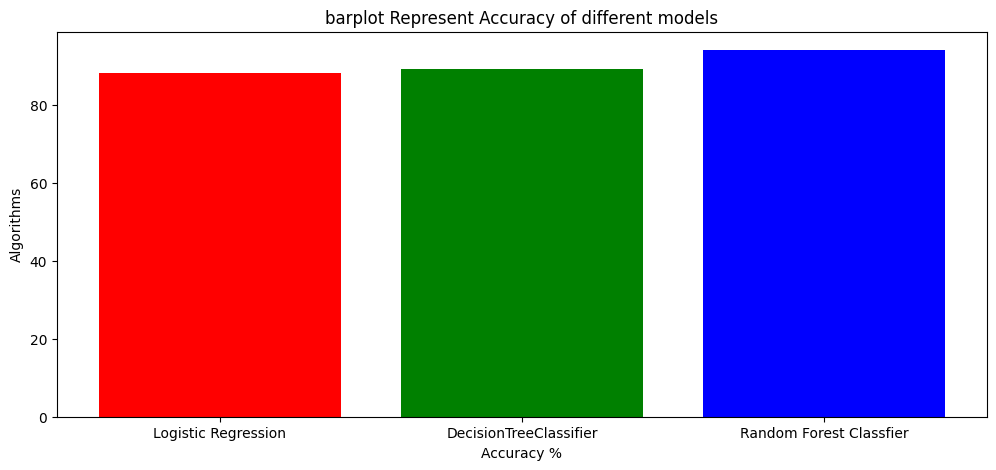

In [ ]:
colors = ['red','green','blue']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **Feature Importance**

In [ ]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'Feature': column_names,
                       'Importance': importances}) \
           .reset_index(drop = True)
    return df

# plotting a Feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['Feature', 'Importance']
    sns.barplot(x = 'Importance', y = 'Feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train, y_train)
base_imp = imp_df(X_train.columns, rf.feature_importances_)
print(base_imp)

        Feature  Importance
0           age    0.072809
1      trestbps    0.028263
2          chol    0.027323
3       thalach    0.070154
4       oldpeak    0.076263
5         sex_0    0.022093
6         sex_1    0.011679
7   chestPain_0    0.121758
8   chestPain_1    0.006852
9   chestPain_2    0.040253
10  chestPain_3    0.001778
11         ca_0    0.093414
12         ca_1    0.011921
13         ca_2    0.019656
14         ca_3    0.006272
15         ca_4    0.004176
16       thal_0    0.000576
17       thal_1    0.001407
18       thal_2    0.054423
19       thal_3    0.131823
20      exang_0    0.074639
21      exang_1    0.078897
22      slope_0    0.000891
23      slope_1    0.008543
24      slope_2    0.034137


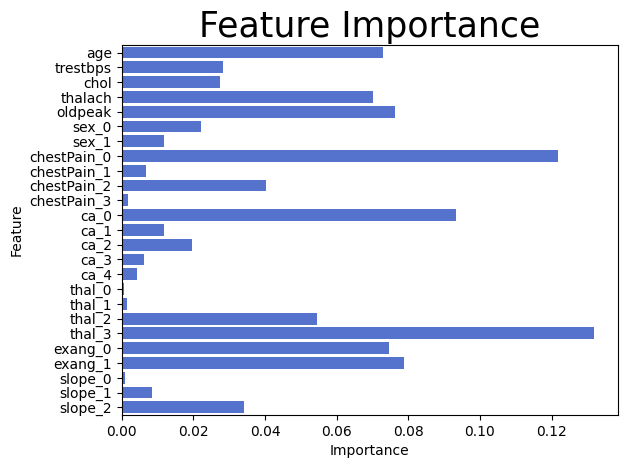

In [ ]:
var_imp_plot(base_imp, 'Feature Importance')